## Inspect Plate Artifacts - Batch 3

**Gregory Way, 2019**

In [6]:
suppressPackageStartupMessages(library(platetools))
suppressPackageStartupMessages(library(ggplot2))

In [2]:
batch <- "2019_06_25_Batch3"
backend_dir <- file.path("..", "..", "backend", batch)

backend_folders = list.files(backend_dir, full.names = FALSE)

backend_files = list()
for (backend_file in backend_folders) {
    backend_files[[backend_file]] <-
        file.path(backend_dir, backend_file, paste0(backend_file, "_normalized_variable_selected.csv"))
}

backend_files

$MutClones
[1] "../../backend/2019_06_25_Batch3/MutClones/MutClones_normalized_variable_selected.csv"

$WTClones
[1] "../../backend/2019_06_25_Batch3/WTClones/WTClones_normalized_variable_selected.csv"

## Load Data

In [3]:
mut_df <- readr::read_csv(backend_files[["MutClones"]], col_types=readr::cols())

print(dim(mut_df))
head(mut_df, 2)

[1]  57 191


Metadata_Plate,Metadata_Well,Metadata_Assay_Plate_Barcode,Metadata_Plate_Map_Name,Metadata_well_position,Metadata_clone_number,Cells_AreaShape_Compactness,Cells_AreaShape_EulerNumber,Cells_AreaShape_Extent,Cells_AreaShape_FormFactor,⋯,Nuclei_Texture_Correlation_AGP_20_00,Nuclei_Texture_Correlation_AGP_20_03,Nuclei_Texture_Correlation_AGP_5_00,Nuclei_Texture_Correlation_ER_20_02,Nuclei_Texture_Correlation_Mito_5_00,Nuclei_Texture_Correlation_RNA_20_02,Nuclei_Texture_InfoMeas1_Mito_5_00,Nuclei_Texture_InverseDifferenceMoment_AGP_20_02,Nuclei_Texture_InverseDifferenceMoment_DNA_20_03,Nuclei_Texture_InverseDifferenceMoment_ER_20_02
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
MutClones,B02,MutClones,MutClones,B02,BZ001,0.6034418,-3.05703,0.05068862,0.6585738,⋯,3.3582920,1.126295,0.00000,1.204256,0.4206682,0.5705776,-1.320394,-0.2247533,1.311671,0.212493
MutClones,B03,MutClones,MutClones,B03,BZ002,-1.0295421,-1.41911,1.11426953,-0.9345095,⋯,-0.3068762,1.536572,-4.29316,3.379792,-6.8157241,0.4181798,3.899485,2.1667509,2.502230,2.646517


In [4]:
wt_df <- readr::read_csv(backend_files[["WTClones"]], col_types=readr::cols())

print(dim(wt_df))
head(wt_df, 2)

[1]  48 191


Metadata_Plate,Metadata_Well,Metadata_Assay_Plate_Barcode,Metadata_Plate_Map_Name,Metadata_well_position,Metadata_clone_number,Cells_AreaShape_Compactness,Cells_AreaShape_EulerNumber,Cells_AreaShape_Extent,Cells_AreaShape_FormFactor,⋯,Nuclei_Texture_Correlation_AGP_20_00,Nuclei_Texture_Correlation_AGP_20_03,Nuclei_Texture_Correlation_AGP_5_00,Nuclei_Texture_Correlation_ER_20_02,Nuclei_Texture_Correlation_Mito_5_00,Nuclei_Texture_Correlation_RNA_20_02,Nuclei_Texture_InfoMeas1_Mito_5_00,Nuclei_Texture_InverseDifferenceMoment_AGP_20_02,Nuclei_Texture_InverseDifferenceMoment_DNA_20_03,Nuclei_Texture_InverseDifferenceMoment_ER_20_02
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
WTClones,B02,WTClones,WTClones,B02,WT001,-0.68165560,0.2433688,0.5543276,0.27729305,⋯,-1.992909,-0.5624821,-0.7311029,-1.798579,-2.05401899,-1.2708266,0.67166455,-0.08257108,0.4544209,-0.6100711
WTClones,B03,WTClones,WTClones,B03,WT001,0.05125114,-0.4970395,-0.1045300,0.07257513,⋯,-1.922169,-0.7716781,-0.1594808,-1.284761,0.01782447,-0.6921738,-0.06878273,-0.44354985,0.2891828,-0.5773808


In [11]:
length(mut_df$Metadata_Well)

[1] 57

## Visualize Platemaps

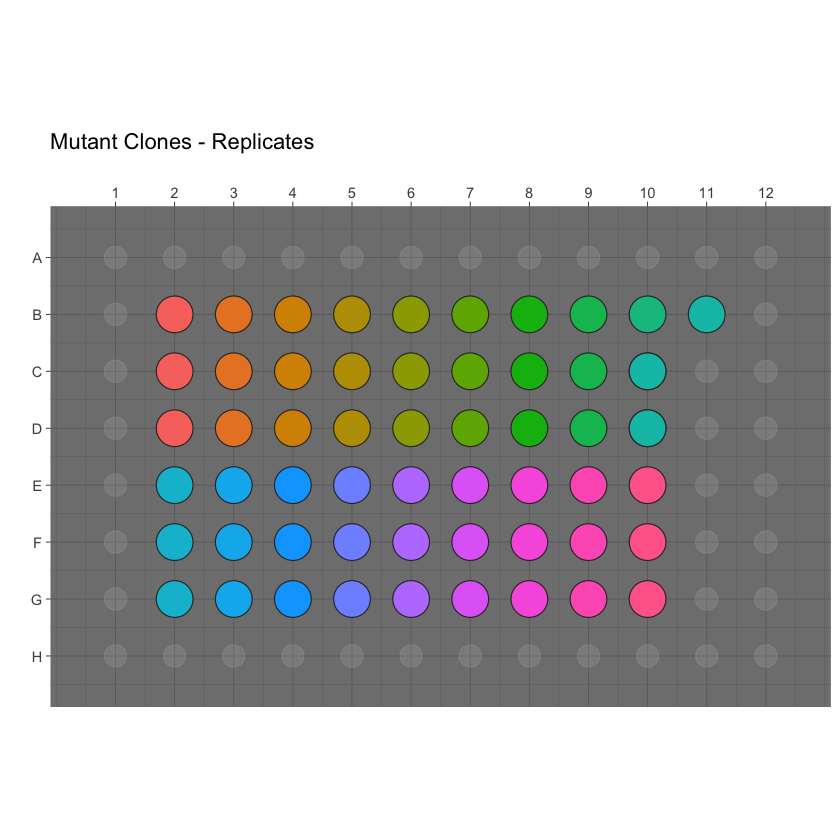

In [15]:
plate_mut_gg <- 
    platetools::raw_map(data = as.character(mut_df$Metadata_clone_number),
                      well = mut_df$Metadata_Well,
                      plate = 96) +
    ggtitle("Mutant Clones - Replicates") +
    theme_dark() +
    scale_fill_discrete() +
    theme(legend.position = "none")
    
plate_mut_gg

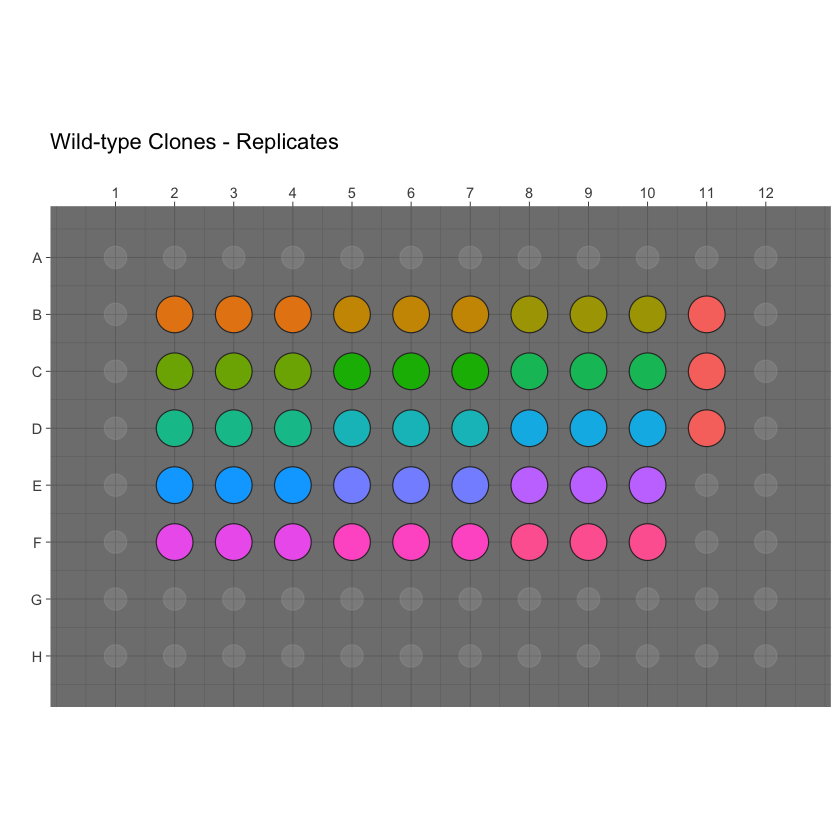

In [16]:
plate_mut_gg <- 
    platetools::raw_map(data = as.character(wt_df$Metadata_clone_number),
                      well = wt_df$Metadata_Well,
                      plate = 96) +
    ggtitle("Wild-type Clones - Replicates") +
    theme_dark() +
    scale_fill_discrete() +
    theme(legend.position = "none")
    
plate_mut_gg